In [1]:
#importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix , r2_score, mean_squared_error , classification_report , accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model, Sequential
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
#Reading Data
df = pd.read_csv("full_gen_data.csv")

In [3]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [4]:
#Exploring info about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [5]:
df.shape

(100000, 24)

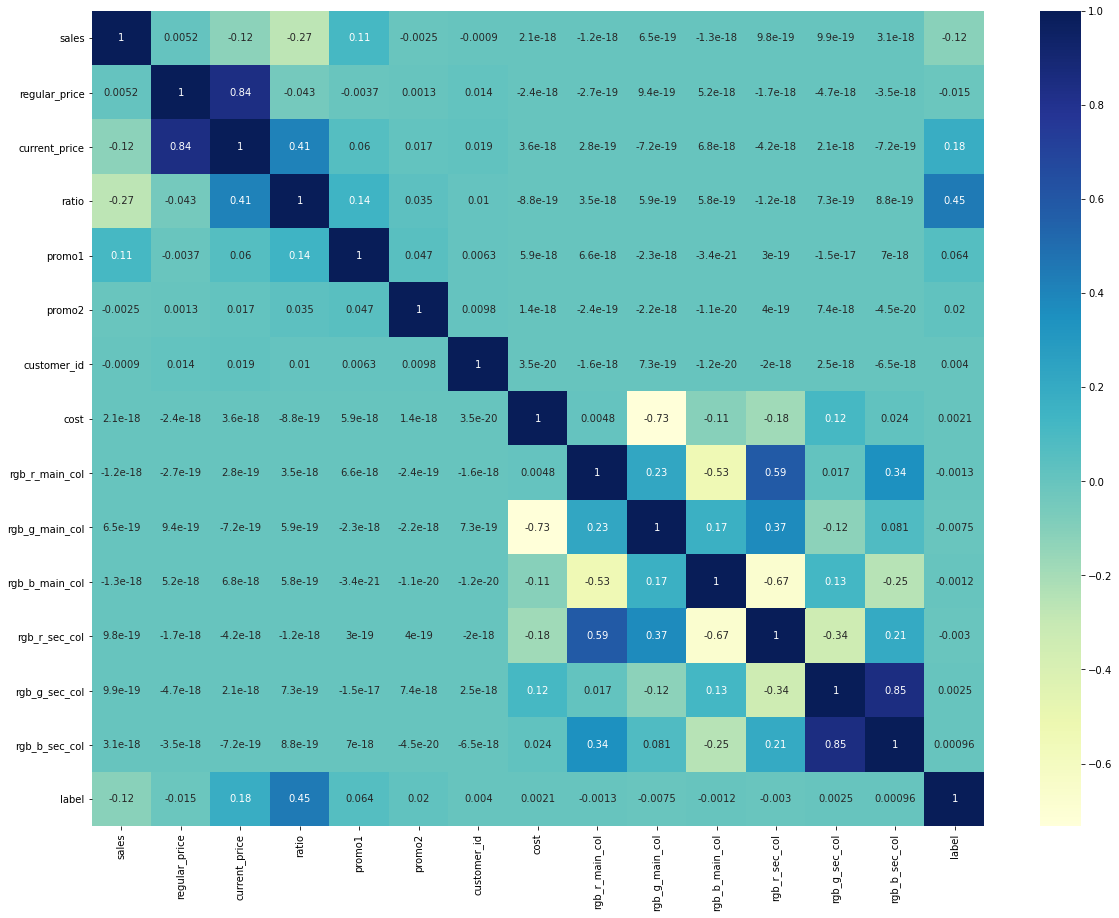

In [6]:
cor = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap= "YlGnBu")
plt.show()

In [7]:
removedColumns = ['article' , 'retailweek' , 'customer_id' , 'article.1' , 'rgb_r_main_col','rgb_g_main_col','rgb_b_main_col','rgb_r_sec_col','rgb_g_sec_col', 'rgb_b_sec_col']

for m in removedColumns:
  df.pop(m)

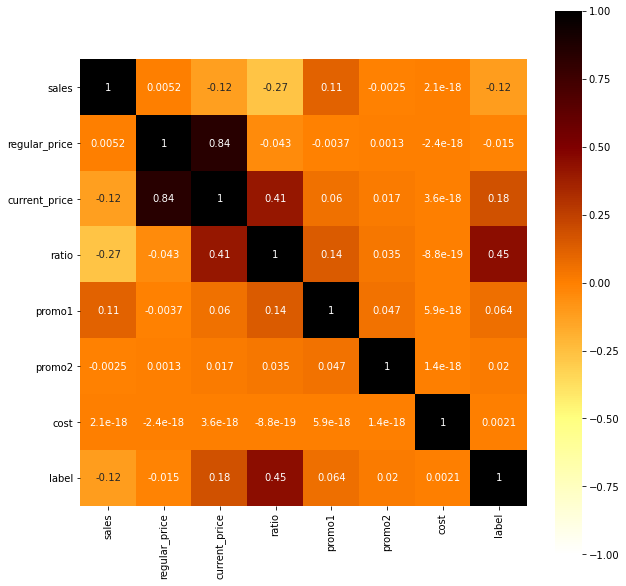

In [8]:
plt.figure(figsize=(10, 10))
new_corr = df.corr()
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='afmhot_r',
            annot=True, 
            square=True)
plt.show()

In [9]:
df

,country,sales,regular_price,current_price,ratio,promo1,promo2,productgroup,category,cost,style,sizes,gender,label
0,Germany,28,5.95,3.95,0.663866,0,0,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,0
1,Germany,28,5.95,3.95,0.663866,0,0,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,0
2,Germany,28,5.95,3.95,0.663866,0,0,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,0
3,Germany,28,5.95,3.95,0.663866,0,0,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,0
4,Germany,28,5.95,3.95,0.663866,0,0,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,227,57.95,26.95,0.465056,0,0,SWEATSHIRTS,TRAINING,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,0
99996,Germany,227,57.95,26.95,0.465056,0,0,SHOES,FOOTBALL GENERIC,9.90,wide,"xs,s,m,l,xl",unisex,0
99997,Germany,227,57.95,26.95,0.465056,0,0,SHOES,INDOOR,5.20,wide,"xxs,xs,s,m,l,xl,xxl",women,0
99998,Germany,227,57.95,26.95,0.465056,0,0,HARDWARE ACCESSORIES,RUNNING,1.29,slim,"xxs,xs,s,m,l,xl,xxl",women,0


# Doing one hot encoding for  the following features : country , productgroup , Category , style , sizes and gender 

### 1- Country_column 

In [10]:
country = df[['country']] 
country_encoder = OneHotEncoder(sparse=False)
country_categories = country_encoder.fit_transform(country)
country_categories

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [11]:
country_encoder.categories_

[array(['Austria', 'France', 'Germany'], dtype=object)]

In [12]:
country_encoded = pd.DataFrame(country_categories , columns=['Austria', 'France', 'Germany'])

In [13]:
country_encoded.head()

,Austria,France,Germany
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


### 2- productgroup_column 

In [14]:
product = df[['productgroup']]
product_encoder = OneHotEncoder(sparse=False)
product_categories = product_encoder.fit_transform(product)
product_categories

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [15]:
product_encoder.categories_

[array(['HARDWARE ACCESSORIES', 'SHOES', 'SHORTS', 'SWEATSHIRTS'],
       dtype=object)]

In [16]:
product_encoded = pd.DataFrame(product_categories , columns=['HARDWARE ACCESSORIES', 'SHOES', 'SHORTS', 'SWEATSHIRTS'])

In [17]:
product_encoded.head()

,HARDWARE ACCESSORIES,SHOES,SHORTS,SWEATSHIRTS
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


### 3- Category_column

In [18]:
category = df[['category']]
category_encoder = OneHotEncoder(sparse=False)
category_categories = category_encoder.fit_transform(category)
category_categories

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [19]:
category_encoder.categories_

[array(['FOOTBALL GENERIC', 'GOLF', 'INDOOR', 'RELAX CASUAL', 'RUNNING',
        'TRAINING'], dtype=object)]

In [20]:
category_encoded = pd.DataFrame(category_categories , columns=['FOOTBALL GENERIC', 'GOLF', 'INDOOR', 'RELAX CASUAL', 'RUNNING','TRAINING'] )

In [21]:
category_encoded.head()

,FOOTBALL GENERIC,GOLF,INDOOR,RELAX CASUAL,RUNNING,TRAINING
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0


### 4- style_column 

In [22]:
style = df[['style']]
style_encoder = OneHotEncoder(sparse=False)
style_categories = style_encoder.fit_transform(style)
style_categories

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [23]:
style_encoder.categories_

[array(['regular', 'slim', 'wide'], dtype=object)]

In [24]:
style_encoded = pd.DataFrame( style_categories , columns=['regular', 'slim', 'wide'])

In [25]:
style_encoded.head()

,regular,slim,wide
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


### 5- sizes_column

In [26]:
sizes = df[['sizes']]
sizes_encoder = OneHotEncoder(sparse=False)
sizes_categories = sizes_encoder.fit_transform(sizes)
sizes_categories

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [27]:
sizes_encoder.categories_

[array(['xs,s,m,l,xl', 'xxs,xs,s,m,l,xl,xxl'], dtype=object)]

In [28]:
sizes_encoded = pd.DataFrame(sizes_categories , columns=['xs,s,m,l,xl', 'xxs,xs,s,m,l,xl,xxl'])

In [29]:
sizes_encoded.head()

,"xs,s,m,l,xl","xxs,xs,s,m,l,xl,xxl"
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


### 6- gender_column

In [30]:
gender = df[['gender']]
gender_encoder = OneHotEncoder(sparse=False)
gender_categories = gender_encoder.fit_transform(gender)
gender_categories


array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [31]:
gender_encoder.categories_

[array(['kids', 'men', 'unisex', 'women'], dtype=object)]

In [32]:
gender_encoded = pd.DataFrame(gender_categories , columns=['kids', 'men', 'unisex', 'women'])

In [33]:
gender_encoded.head()

,kids,men,unisex,women
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0


# Concatenating to  original dataset

In [34]:
new_df = pd.concat([df ,country_encoded, product_encoded, category_encoded ,gender_encoded ,sizes_encoded , style_encoded] , axis=1)

In [35]:
new_df.columns

Index(['country', 'sales', 'regular_price', 'current_price', 'ratio', 'promo1',
       'promo2', 'productgroup', 'category', 'cost', 'style', 'sizes',
       'gender', 'label', 'Austria', 'France', 'Germany',
       'HARDWARE ACCESSORIES', 'SHOES', 'SHORTS', 'SWEATSHIRTS',
       'FOOTBALL GENERIC', 'GOLF', 'INDOOR', 'RELAX CASUAL', 'RUNNING',
       'TRAINING', 'kids', 'men', 'unisex', 'women', 'xs,s,m,l,xl',
       'xxs,xs,s,m,l,xl,xxl', 'regular', 'slim', 'wide'],
      dtype='object')

In [36]:
removedColumns = ['country' , 'productgroup' , 'category' , 'style' , 'sizes' , 'gender', 'regular_price', 'current_price' ]

for m in removedColumns:
  new_df.pop(m)

In [37]:
new_df

,sales,ratio,promo1,promo2,cost,label,Austria,France,Germany,HARDWARE ACCESSORIES,...,TRAINING,kids,men,unisex,women,"xs,s,m,l,xl","xxs,xs,s,m,l,xl,xxl",regular,slim,wide
0,28,0.663866,0,0,13.29,0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,28,0.663866,0,0,2.29,0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,28,0.663866,0,0,1.70,0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,28,0.663866,0,0,9.00,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,28,0.663866,0,0,9.60,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,227,0.465056,0,0,4.20,0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
99996,227,0.465056,0,0,9.90,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
99997,227,0.465056,0,0,5.20,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
99998,227,0.465056,0,0,1.29,0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Machine Learning Algorithm 

In [38]:
X = new_df.drop('label', axis=1)
y = new_df['label']

In [39]:
#Scaling the data for Auto-Encoder 
X_scaled = MinMaxScaler().fit_transform(X)
X_buy_scaled = X_scaled[y == 0]
X_not_buy_scaled = X_scaled[y == 1]

In [40]:
# The Input Layer
input_layer = Input(shape =(X.shape[1], ))
  
# The Encoder network
encoded = Dense(100, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(25, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(12, activation ='tanh',
                activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(6, activation ='relu')(encoded)
  
# The Decoder network
decoded = Dense(12, activation ='tanh')(encoded)
decoded = Dense(25, activation ='tanh')(decoded)
decoded = Dense(50, activation ='tanh')(decoded)
decoded = Dense(100, activation ='tanh')(decoded)
  
# The Output Layer
output_layer = Dense(X.shape[1], activation ='relu')(decoded)

In [41]:
# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="adadelta", loss ="mse")
  
# Training the Auto-Encoder Network
autoencoder.fit(X_buy_scaled, X_buy_scaled, 
                batch_size = 16, epochs = 75, 
                shuffle = True, validation_split = 0.20)

Epoch 1/75
4304/4304 [==============================] - 28s 6ms/step - loss: 0.2030 - val_loss: 0.1908
Epoch 2/75
4304/4304 [==============================] - 24s 5ms/step - loss: 0.1873 - val_loss: 0.1841
Epoch 3/75
4304/4304 [==============================] - 23s 5ms/step - loss: 0.1809 - val_loss: 0.1779
Epoch 4/75
4304/4304 [==============================] - 23s 5ms/step - loss: 0.1753 - val_loss: 0.1726
Epoch 5/75
4304/4304 [==============================] - 23s 5ms/step - loss: 0.1695 - val_loss: 0.1669
Epoch 6/75
4304/4304 [==============================] - 22s 5ms/step - loss: 0.1646 - val_loss: 0.1622
Epoch 7/75
4304/4304 [==============================] - 22s 5ms/step - loss: 0.1597 - val_loss: 0.1579
Epoch 8/75
4304/4304 [==============================] - 23s 5ms/step - loss: 0.1560 - val_loss: 0.1545
Epoch 9/75
4304/4304 [==============================] - 23s 5ms/step - loss: 0.1525 - val_loss: 0.1510
Epoch 10/75
4304/4304 [==============================] - 23s 5ms/step - l

In [42]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])
hidden_representation.add(autoencoder.layers[4])


In [43]:
buy_hidden_rep = hidden_representation.predict(X_buy_scaled)
not_buy_hidden_rep = hidden_representation(X_not_buy_scaled)



In [44]:
encoded_X = np.append(buy_hidden_rep , not_buy_hidden_rep , axis = 0)
y_buy = np.zeros(buy_hidden_rep.shape[0])
y_not_buy = np.ones(not_buy_hidden_rep.shape[0])
encoded_y = np.append(y_buy , y_not_buy)


In [45]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(encoded_X, encoded_y, test_size = 0.2)


### Logistic regression

In [46]:
clf_LR = LogisticRegression(random_state=0).fit(X_train_encoded, y_train_encoded)

C:\Users\menna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
y_pred_LR = clf_LR.predict(X_test_encoded)
confusion_matrix(y_test_encoded , y_pred_LR)

array([[17061,   111],
       [ 2756,    72]], dtype=int64)

In [48]:
print(accuracy_score(y_test_encoded , y_pred_LR))

0.85665


In [49]:
scores = cross_val_score(clf_LR, encoded_X, encoded_y, cv=20)

C:\Users\menna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\menna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [50]:
scores

array([0.8596, 0.8582, 0.8592, 0.859 , 0.858 , 0.86  , 0.8564, 0.8564,
       0.8592, 0.8578, 0.86  , 0.8588, 0.8598, 0.8606, 0.8576, 0.857 ,
       0.8584, 0.8586, 0.8574, 0.8604])

### SVC

In [51]:
svc_clf = SVC(C = 1 , kernel="sigmoid")
svc_clf.fit(X_train_encoded, y_train_encoded)

SVC(C=1, kernel='sigmoid')

In [52]:
y_pred_svc = svc_clf.predict(X_test_encoded)
confusion_matrix(y_test_encoded , y_pred_svc)

array([[14936,  2236],
       [ 2350,   478]], dtype=int64)

In [53]:
print(accuracy_score(y_test_encoded , y_pred_svc))

0.7707


### XGBoost

In [54]:
model = XGBClassifier()
model.fit(X_train_encoded, y_train_encoded)

C:\Users\menna\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
y_pred_XGB = model.predict(X_test_encoded)
confusion_matrix(y_test_encoded , y_pred_XGB)

array([[16919,   253],
       [ 2641,   187]], dtype=int64)

In [56]:
print(accuracy_score(y_test_encoded , y_pred_XGB))

0.8553


In [57]:
scores = cross_val_score(model, encoded_X, encoded_y, cv=5)

C:\Users\menna\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\menna\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\menna\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\menna\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\menna\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [71]:
scores

array([0.85885, 0.8593 , 0.85785, 0.85865, 0.85825])

# Grid Search Selection 
### Furthermore, to identify the best algorithm and best parameters, we can use the Grid Search algorithm.

In [72]:
# Exhaustive search over specified parameter values for an estimator.
grid_param={ 'n_estimators': [100, 300, 500, 800, 1000],
             "max_depth":[3,4,5,7],
           "learning_rate":[0.1,0.01,0.05],
           "gamma":[0,0.25,1],
           "reg_lambda":[0,1,10],
           "scale_pos_weight":[1,3,5],
           "subsample":[0.8],
           "colsample_bytree":[0.5]}

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
# The XGBClassifier is intialized 
xgb_col=xgb.XGBClassifier(objective="binary:logistic")
# The GridSearchCV class is initialized
grid_cv=GridSearchCV(xgb_col,grid_param,n_jobs=-1,cv=7,scoring='accuracy')
# Calling fit method 
grid_cv.fit(encoded_X,encoded_y)

In [ ]:
#Parameter setting that gave the best results on the hold out data
grid_cv.best_params